In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import sys
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.modeling.train_sentiment import train_and_evaluate_sentiment

In [4]:
sns.set(style="whitegrid")

## Training & evaluation

In [5]:
# Step 1: Execute model training and evaluation
train_and_evaluate_sentiment()
print("Sentiment model pipeline executed.")

Epoch 1/30
836/836 - 79s - loss: 0.8483 - accuracy: 0.4817 - val_loss: 0.7377 - val_accuracy: 0.6753 - lr: 0.0010 - 79s/epoch - 95ms/step
Epoch 2/30
836/836 - 78s - loss: 0.5680 - accuracy: 0.6776 - val_loss: 0.6367 - val_accuracy: 0.7158 - lr: 0.0010 - 78s/epoch - 94ms/step
Epoch 3/30
836/836 - 82s - loss: 0.4056 - accuracy: 0.7931 - val_loss: 0.5117 - val_accuracy: 0.7783 - lr: 0.0010 - 82s/epoch - 98ms/step
Epoch 4/30
836/836 - 83s - loss: 0.2998 - accuracy: 0.8541 - val_loss: 0.4944 - val_accuracy: 0.8027 - lr: 0.0010 - 83s/epoch - 99ms/step
Epoch 5/30
836/836 - 86s - loss: 0.2268 - accuracy: 0.8890 - val_loss: 0.4596 - val_accuracy: 0.8315 - lr: 0.0010 - 86s/epoch - 103ms/step
Epoch 6/30
836/836 - 84s - loss: 0.1771 - accuracy: 0.9150 - val_loss: 0.4917 - val_accuracy: 0.8292 - lr: 0.0010 - 84s/epoch - 100ms/step
Epoch 7/30
836/836 - 81s - loss: 0.1341 - accuracy: 0.9371 - val_loss: 0.4829 - val_accuracy: 0.8410 - lr: 0.0010 - 81s/epoch - 97ms/step
Epoch 8/30
836/836 - 82s - loss:

In [10]:
# Load metrics report
import json
with open("../outputs/sentiment_accuracy.txt", "r") as f:
    report = json.load(f)

In [12]:
# Convert classification report to DataFrame
report_df = pd.DataFrame(report).T
report_df = report_df.round(3)
display(report_df)

,precision,recall,f1-score,support
negative,0.746,0.821,0.782,2001.000
neutral,0.905,0.833,0.868,8805.000
positive,0.698,0.835,0.760,2556.000
accuracy,0.832,0.832,0.832,0.832
macro avg,0.783,0.830,0.803,13362.000
weighted avg,0.842,0.832,0.834,13362.000


<Figure size 1000x400 with 0 Axes>

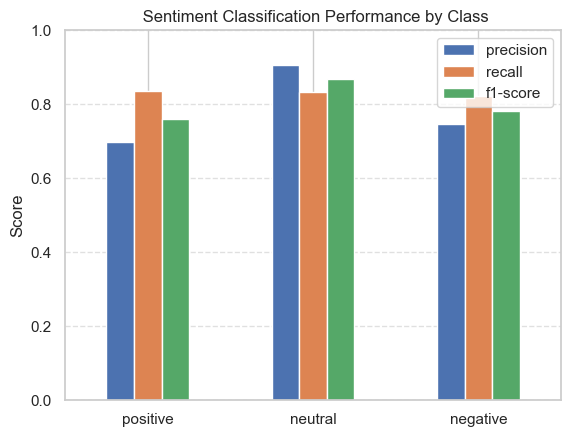

In [13]:
#  Visualize key performance metrics
plt.figure(figsize=(10, 4))
report_df.loc[["positive", "neutral", "negative"], ["precision", "recall", "f1-score"]].plot(kind="bar")
plt.title(" Sentiment Classification Performance by Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [14]:
#  Sample predictions
pred_df = pd.read_csv("../outputs/predictions_sentiment.csv")
display(pred_df.sample(20))

,true_sentiment,predicted_sentiment
8735,negative,neutral
5316,neutral,neutral
3087,negative,neutral
10590,neutral,neutral
4006,neutral,neutral
12914,neutral,positive
12090,neutral,neutral
5113,neutral,neutral
10665,neutral,neutral
9459,neutral,neutral
